In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rej = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv')
rej.shape

(27648741, 9)

In [ ]:
ac = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/accepted_2007_to_2018q4 (1).csv/accepted_2007_to_2018Q4.csv')
ac.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2260701, 151)

In [ ]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
ac.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_

In [ ]:
ac.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

In [ ]:
ac.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
ac.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [ ]:
ac.isnull().count

<bound method DataFrame.count of             id  member_id  ...  settlement_percentage  settlement_term
0        False       True  ...                   True             True
1        False       True  ...                   True             True
2        False       True  ...                   True             True
3        False       True  ...                   True             True
4        False       True  ...                   True             True
...        ...        ...  ...                    ...              ...
2260696  False       True  ...                   True             True
2260697  False       True  ...                  False            False
2260698  False       True  ...                   True             True
2260699  False       True  ...                   True             True
2260700  False       True  ...                   True             True

[2260701 rows x 151 columns]>

In [ ]:
ac.isnull().sum(axis = 0)

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [ ]:
ac.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

In [ ]:
missing_data = ac.isnull().mean().sort_values(ascending=False)*100
missing_data

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
hardship_loan_status                           99.517097
hardship_dpd                                   99.517097
hardship_reason                                99.517097
                                                 ...    
initial_list_status                             0.001460
revol_bal                                       0.001460
hardship_flag                                   0.001460
fico_range_high                                 0.001460
id                                              0.000000
Length: 151, dtype: float64

In [ ]:
drop_columns = sorted(list(missing_data[missing_data > 25].index))

In [ ]:
drop_columns

['all_util',
 'annual_inc_joint',
 'debt_settlement_flag_date',
 'deferral_term',
 'desc',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'se

In [ ]:
print(len(drop_columns))

58


In [ ]:
ac.drop(labels=drop_columns, axis=1, inplace=True)

In [ ]:
ac.shape

(2260701, 93)

In [ ]:
ac.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,2260668.0,2.260639e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,1.965233e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06
mean,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,1.0,4.147942e-03,2.327317e+02,1.424922e+05,3.457394e+04,4.521656e+00,1.354780e+04,1.139426e+04,5.789995e+01,8.464413e-03,1.236983e+01,1.257378e+02,1.814916e+02,1.402409e+01,8.297469e+00,1.555382e+00,2.484485e+01,7.024194e+00,5.002082e-01,3.676069e+00,5.629468e+00,4.774183e+00,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04
std,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,0.0,6.961656e-02,8.518462e+03,1.606926e+05,3.672850e+04,3.164229e+00,1.647408e+04,1.659953e+04,2.858347e+01,1.048098e-01,7.264648e+02,5.338218e+01,9.711845e+01,1.753308e+01,9.208557e+00,1.904981e+00,3.231925e+01,5.965411e+00,1.350326e+00,2.324646e+00,3.382874e+00,3.037921e+00,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+00,3.621616e+01,3.646130e-01,3.775338e-01,1.815748e+05,4.991124e+04,2.300656e+04,4.507298e+04
min,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e

In [ ]:
ac.isnull().sum()

id                                0
loan_amnt                        33
funded_amnt                      33
funded_amnt_inv                  33
term                             33
                              ...  
total_bc_limit                50063
total_il_high_credit_limit    70309
hardship_flag                    33
disbursement_method              33
debt_settlement_flag             33
Length: 93, dtype: int64

In [ ]:
def missing_values(loans):
  missing_val = ac.isnull().sum()
  missing_val_percent = 100 * missing_val/len(loans)
  missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
  missing_val_table_rename = missing_val_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
  missing_val_table_rename = missing_val_table_rename[missing_val_table_rename.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(2)
  print('DataFrame contains ' + str(loans.shape[1]) + ' columns.\n' 'There are ' + str(missing_val_table_rename.shape[0]) + ' columns having missing values')
  return missing_val_table_rename

null_accepted = missing_values(ac)
null_accepted.head()

DataFrame contains 93 columns.
There are 92 columns having missing values


,Missing Values,% of Total Values
mths_since_recent_inq,295468,13.07
emp_title,167002,7.39
num_tl_120dpd_2m,153690,6.80
emp_length,146940,6.50
mo_sin_old_il_acct,139104,6.15


In [ ]:
excluded_features = ['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d', 'policy_code', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag']
len(excluded_features)

60

In [ ]:
pd.options.mode.chained_assignment = None
ac.drop(labels=excluded_features, axis=1, inplace=True)

In [ ]:
ac.shape

(2260701, 33)

In [ ]:
ac['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
ac['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [ ]:
# Only keep the values associated with "Fully Paid" and "Charged Off"
ac = ac.loc[ac['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [ ]:
ac['loan_status'].value_counts(dropna=False)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

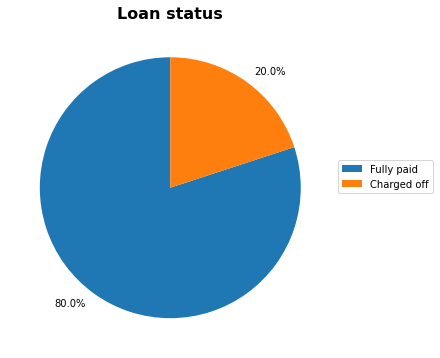

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

chargeoffrate = ac['loan_status'].value_counts(normalize=True,dropna=False)
# Showing it visually in a pie chart; creating the labels for the chart:
labels = []
for i in chargeoffrate:
    labels.append(str(round(i*100,0))+"%")

# Creating the pie chart
plt.figure(figsize=(12,6))
plt.title('Loan status', fontsize=16, fontweight='bold');
plt.pie(chargeoffrate,labels=labels,startangle=90);
plt.legend(['Fully paid','Charged off'], loc='best', bbox_to_anchor=(1, 0.6));

In [ ]:
chargeoffamount = ac.groupby('loan_status').loan_amnt.sum().sort_values(ascending=False)

# Displaying the amounts in $bn 
print("Fully paid loans amount to $"+str(round(chargeoffamount[0]/1e9,1))+"bn")
print("Charged off loans amount to $"+str(round(chargeoffamount[1]/1e9,1))+"bn")

# Percentage of the charge off rate, i.e. the cost of risk (CoR)? 
Total_CoR = chargeoffamount[1]/ac['loan_amnt'].sum()
print("Life time cost of risk (CoR) is "+str(round(Total_CoR*100,1))+"%")

Fully paid loans amount to $15.2bn
Charged off loans amount to $4.2bn
Life time cost of risk (CoR) is 21.5%


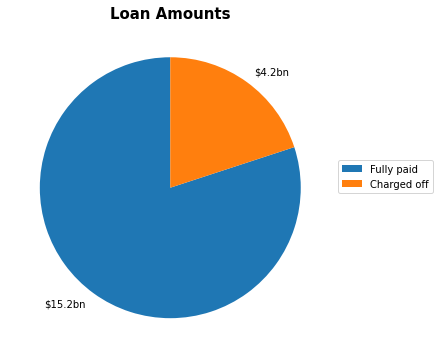

In [ ]:
l = []
for i in chargeoffamount:
    l.append('$'+str(round(i/1e9,1))+"bn")

# Creating the pie chart
plt.figure(figsize=(12,6))
plt.title('Loan Amounts', fontsize=15, fontweight='bold');
plt.pie(chargeoffrate,labels=l,startangle=90);
plt.legend(['Fully paid','Charged off'], loc='best', bbox_to_anchor=(1, 0.6));

In [ ]:
ac.shape

(1345310, 33)

In [ ]:
ac.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1345310.0,14419.972014,8717.050787,500.00,8000.00,12000.00,20000.00,4.000000e+04
int_rate,1345310.0,13.239619,4.768716,5.31,9.75,12.74,15.99,3.099000e+01
installment,1345310.0,438.075533,261.512604,4.93,248.48,375.43,580.73,1.719830e+03
annual_inc,1345310.0,76247.636414,69925.098427,0.00,45780.00,65000.00,90000.00,1.099920e+07
dti,1344936.0,18.282667,11.160446,-1.00,11.79,17.61,24.06,9.990000e+02
fico_range_low,1345310.0,696.185039,31.852512,625.00,670.00,690.00,710.00,8.450000e+02
fico_range_high,1345310.0,700.185177,31.853161,629.00,674.00,694.00,714.00,8.500000e+02
pub_rec,1345310.0,0.215276,0.601865,0.00,0.00,0.00,0.00,8.600000e+01
recoveries,1345310.0,241.439179,956.527830,0.00,0.00,0.00,0.00,3.985955e+04
collection_recovery_fee,1345310.0,40.229900,167.745093,0.00,0.00,0.00,0.00,7.174719e+03


In [ ]:
ac['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [ ]:
ac["grade"].value_counts()

B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: grade, dtype: int64

In [ ]:
ac['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2', 'E2',
       'A4', 'E3', 'C5', 'A1', 'D4', 'F3', 'D1', 'B3', 'D3', 'D5', 'A5',
       'F2', 'E4', 'D2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

In [ ]:
ac["sub_grade"].value_counts()

C1    85494
B4    83199
B5    82538
B3    81827
C2    79213
C3    74998
C4    74421
B2    74024
B1    71153
C5    67560
A5    64003
A4    52235
D1    51321
D2    44848
A1    43678
D3    39317
A3    37996
A2    37178
D4    35566
D5    29901
E1    23749
E2    21377
E3    18387
E4    15720
E5    14417
F1     9970
F2     7198
F3     6088
F4     4859
F5     3943
G1     2997
G2     2131
G3     1614
G4     1280
G5     1110
Name: sub_grade, dtype: int64

In [ ]:
ac['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [ ]:
ac['int_rate'].unique()

array([13.99, 11.99, 10.78, 22.45, 13.44,  9.17,  8.49,  6.49, 11.48,
       12.88, 19.48,  7.49, 19.89, 14.85,  5.32, 17.97, 24.24, 15.77,
        9.8 , 17.27, 18.49,  7.91, 23.13, 20.5 , 16.59, 18.99, 26.06,
       21.48,  6.99, 27.49, 26.99, 27.99, 28.49,  6.  , 25.09, 28.99,
       16.55,  7.89, 12.59, 13.67, 10.64,  7.26, 17.86, 14.48, 13.18,
        6.24,  8.38, 15.41,  9.76, 21.99, 16.99, 25.99, 17.57, 18.2 ,
       22.99,  6.89, 11.22, 19.99, 27.31, 20.99, 27.88, 23.99, 24.99,
       26.77, 12.05,  8.18,  9.99, 11.49, 10.99, 14.33, 16.9 , 11.53,
       18.55, 14.65, 13.33, 12.69, 18.25, 19.19, 12.29, 15.61, 25.78,
       19.52, 24.5 ,  6.39,  5.93,  6.92,  6.68, 21.67, 20.49, 25.8 ,
       18.84, 25.57, 25.83, 25.89,  8.67, 14.99, 17.14,  8.19, 10.49,
       11.44,  6.03, 12.39, 15.59,  9.49, 13.66, 14.31, 12.99, 15.99,
       16.49, 19.24, 18.54,  7.34, 11.98, 21.85, 20.39,  9.43,  5.31,
        6.07, 14.07, 15.04, 18.45, 10.9 , 13.58, 17.47, 16.01,  7.96,
       23.87, 30.65,

In [ ]:
ac["int_rate"].value_counts()

10.99    37654
11.99    33110
13.99    29359
5.32     28819
9.17     26048
         ...  
22.64        1
16.96        1
20.52        1
17.46        1
16.71        1
Name: int_rate, Length: 654, dtype: int64

In [ ]:
ac["dti"].isnull().sum()

374

In [ ]:
ac["loan_status"][ac["dti"].isnull()].value_counts()

Fully Paid     303
Charged Off     71
Name: loan_status, dtype: int64

In [ ]:
ac.dropna(subset=["dti"], axis=0, inplace=True)

In [ ]:
ac.shape

(1344936, 33)

In [ ]:
ac["loan_status"][ac["annual_inc"]<1000].value_counts()

Fully Paid     15
Charged Off     8
Name: loan_status, dtype: int64

In [ ]:
ac["loan_status"][ac["annual_inc"]<=5000].value_counts()

Fully Paid     174
Charged Off     47
Name: loan_status, dtype: int64

In [ ]:
(len(ac["loan_status"][ac["annual_inc"]<=5000].index) / ac.shape[0])*100

0.016432008660635152

In [ ]:
ac["loan_status"][ac["dti"]>43].value_counts()

Fully Paid     3633
Charged Off    1575
Name: loan_status, dtype: int64

In [ ]:
ac[["loan_amnt","term","int_rate","installment","grade","sub_grade", "annual_inc", "dti"]][ac["loan_status"]=="Fully Paid"].describe()

,loan_amnt,int_rate,installment,annual_inc,dti
count,1.076448e+06,1.076448e+06,1.076448e+06,1.076448e+06,1.076448e+06
mean,1.413362e+04,1.262276e+01,4.313062e+02,7.772782e+04,1.781163e+01
std,8.668302e+03,4.526806e+00,2.607451e+02,7.093296e+04,1.093593e+01
min,5.000000e+02,5.310000e+00,4.930000e+00,1.600000e+01,-1.000000e+00
25%,7.500000e+03,9.170000e+00,2.409200e+02,4.700000e+04,1.143000e+01
50%,1.200000e+04,1.221000e+01,3.682200e+02,6.500000e+04,1.711000e+01
75%,2.000000e+04,1.531000e+01,5.730600e+02,9.300000e+04,2.344000e+01
max,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02


In [ ]:
ac[["loan_amnt","term","int_rate","installment","grade","sub_grade", "annual_inc", "dti"]][ac["loan_status"]=="Charged Off"].describe()

,loan_amnt,int_rate,installment,annual_inc,dti
count,268488.000000,268488.000000,268488.00000,2.684880e+05,268488.000000
mean,15564.086570,15.710373,465.11951,7.041936e+04,20.171196
std,8813.760559,4.910159,262.74746,6.539353e+04,11.831747
min,900.000000,5.310000,21.62000,2.000000e+01,0.000000
25%,9000.000000,12.290000,275.29000,4.300000e+04,13.550000
50%,14350.000000,15.050000,402.83000,6.000000e+04,19.760000
75%,20400.000000,18.550000,605.30250,8.500000e+04,26.310000
max,40000.000000,30.990000,1717.63000,9.500000e+06,999.000000


In [ ]:
ac[ac["loan_status"] == "Fully Paid"].shape


(1076448, 33)

In [ ]:
ac["dti"][ac["loan_status"]=="Fully Paid"].describe()

count    1.076448e+06
mean     1.781163e+01
std      1.093593e+01
min     -1.000000e+00
25%      1.143000e+01
50%      1.711000e+01
75%      2.344000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [ ]:
ac[ac["loan_status"] == "Charged Off"].shape

(268488, 33)

In [ ]:
ac["dti"][ac["dti"]>45][ac["loan_status"]=="Charged Off"].describe()

count    1294.000000
mean       78.472790
std       101.637268
min        45.010000
25%        48.112500
50%        54.440000
75%        70.150000
max       999.000000
Name: dti, dtype: float64

In [ ]:
ac["dti"][ac["dti"]>45][ac["loan_status"]=="Fully Paid"].describe()

count    3037.000000
mean       85.161597
std       116.312972
min        45.010000
25%        48.340000
50%        55.530000
75%        72.640000
max       999.000000
Name: dti, dtype: float64

In [ ]:
ac.groupby("sub_grade")["int_rate"].mean()

sub_grade
A1     5.538516
A2     6.521857
A3     7.119534
A4     7.513061
A5     8.200653
B1     8.904804
B2     9.907361
B3    10.749495
B4    11.493973
B5    12.009841
C1    12.756056
C2    13.436227
C3    14.019430
C4    14.710971
C5    15.549887
D1    16.380632
D2    17.266645
D3    17.951620
D4    18.580735
D5    19.378353
E1    19.798639
E2    20.473304
E3    21.195686
E4    22.083966
E5    23.218939
F1    23.923315
F2    24.505139
F3    25.276805
F4    25.885399
F5    26.573115
G1    27.271818
G2    27.352394
G3    27.815273
G4    28.396156
G5    28.750406
Name: int_rate, dtype: float64

In [ ]:
import matplotlib.ticker as mticker

def plot_var(col_name, full_name, df=ac, continuous=True, rotation=0, alignment='center'):
    
    
    # Set up figure space:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)
    sn.set(palette='bright')
    
    # Set the font options for the x/y axes labels:
    #font.set_style('italic')
    
    # Plot distribution of the variable without showing charge off rate
    if continuous:
        # Show a histogram to visualise variable
        sn.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1, bins=30)
    else:
        x_labels = ac[col_name].sort_values().unique()
        sn.countplot(x=df[col_name], order=sorted(df[col_name].unique()), ax=ax1).set_xticklabels(x_labels, rotation=rotation, horizontalalignment=alignment)
    
    # Formatting the x labels
    ax1.set_xlabel(full_name)
    
    # Formatting the y labels
    y_labels_1 = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
    ax1.yaxis.set_major_locator(mticker.FixedLocator(ax1.get_yticks().tolist()))
    ax1.set_yticklabels(y_labels_1)
    ax1.set_ylabel('Count')
    # Formatting the title
    ax1.set_title(full_name+"\n", fontweight='bold')

    # Plot distribution of variable split by loan status 
    if continuous:
        sn.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('Loan status')
        ax2.set_title(full_name + ' by loan status'+"\n", fontweight='bold')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sn.barplot(x=charge_off_rates.index, y=charge_off_rates.values, ax=ax2)
        
        # Formatting the x-axis
        ax2.set_xticklabels(charge_off_rates.index,rotation=rotation, horizontalalignment=alignment)
        
        # Formatting the y-axis
        y_labels_2 = ['{:,.0f}'.format(x) + '%' for x in ax2.get_yticks()*100]
        ax2.yaxis.set_major_locator(mticker.FixedLocator(ax2.get_yticks().tolist()))
        ax2.set_yticklabels(y_labels_2)
        ax2.set_ylabel('Proportion of loans charged off')

        # Formatting the title 
        ax2.set_title('Charge off rate by ' + full_name+"\n", fontweight='bold')
    
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()


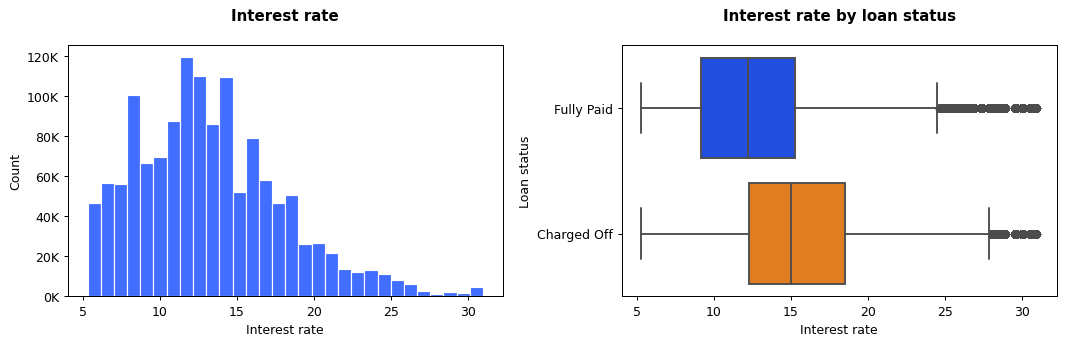

In [ ]:
plot_var('int_rate', 'Interest rate', ac)

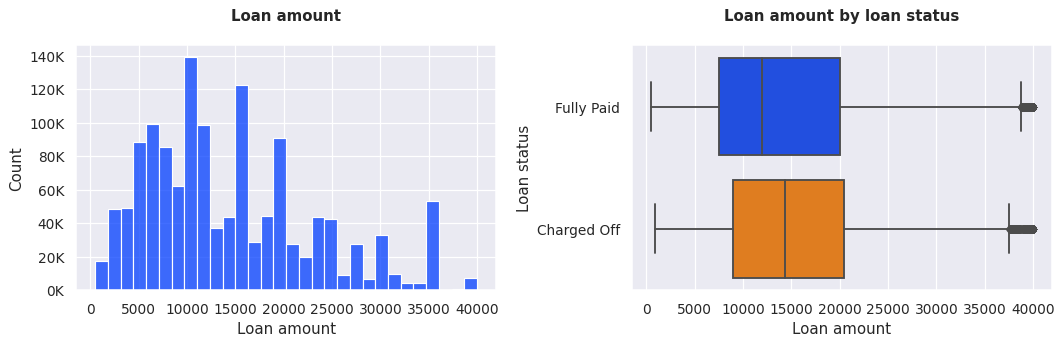

In [ ]:
plot_var('loan_amnt', 'Loan amount')

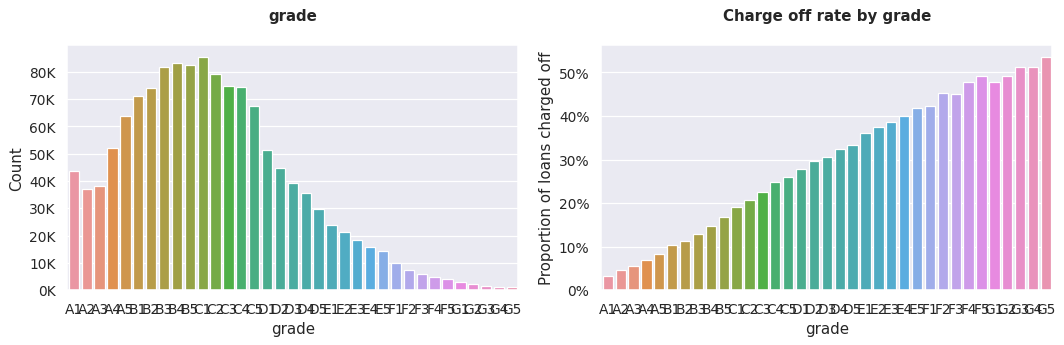

In [ ]:
plot_var('sub_grade','grade',continuous=False)

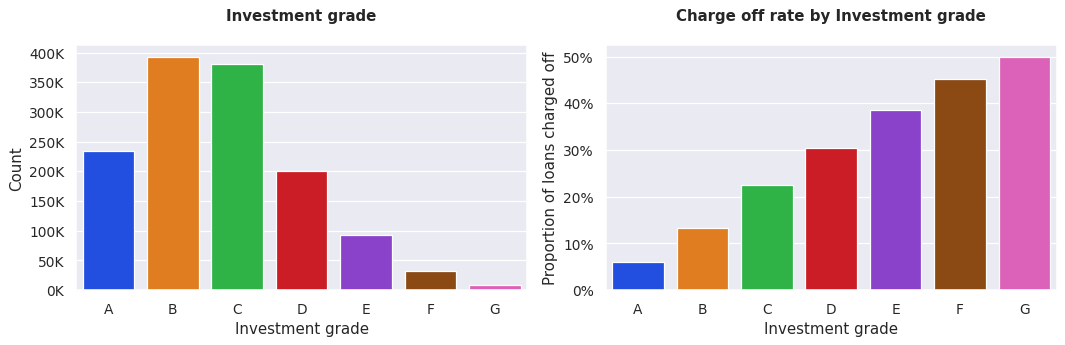

In [ ]:
plot_var('grade','Investment grade',continuous=False)

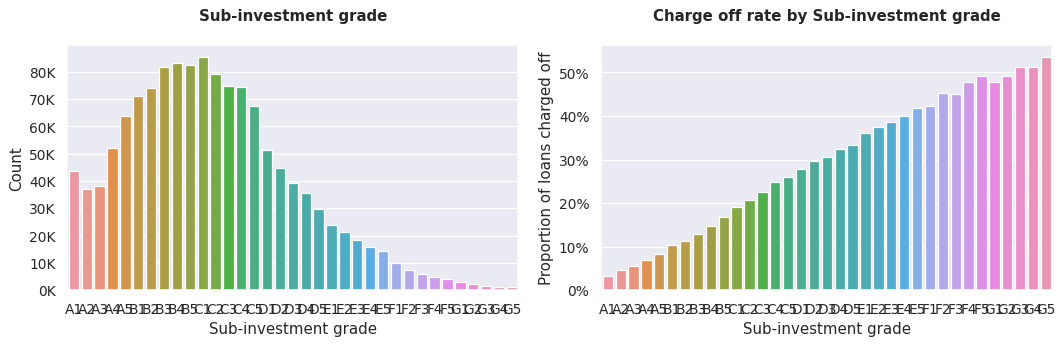

In [ ]:
plot_var('sub_grade','Sub-investment grade',continuous=False)


In [ ]:
loan = ac['loan_status'].value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Count')

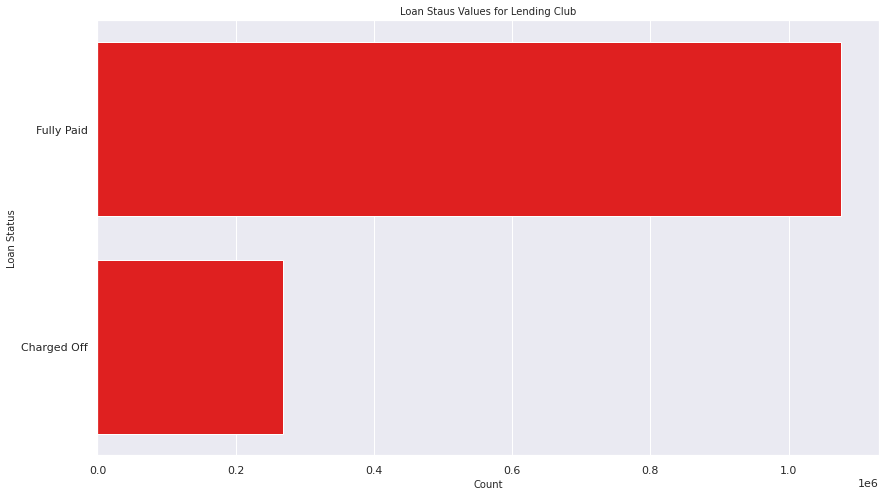

In [ ]:
plt.figure(figsize=(14,8))

sns.barplot(y = loan.index, x = loan,color = 'red')
plt.title('Loan Staus Values for Lending Club',fontsize=10)
plt.ylabel('Loan Status', fontsize=10)
plt.xlabel('Count',fontsize=10)

In [ ]:
gr = ac['grade'].value_counts()

Text(0.5, 0, 'Count')

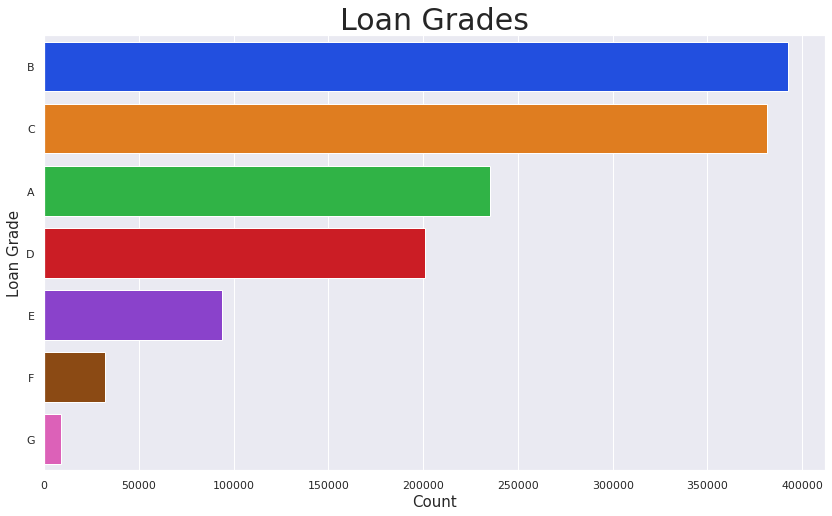

In [ ]:
plt.figure(figsize=(14,8))

sns.barplot(y=gr.index, x=gr)
plt.title('Loan Grades', fontsize=30)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

In [ ]:
rej.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [ ]:
rej.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [ ]:
rej.shape

(27648741, 9)

In [ ]:
rej.describe

<bound method NDFrame.describe of           Amount Requested Application Date  ... Employment Length  Policy Code
0                   1000.0       2007-05-26  ...           4 years          0.0
1                   1000.0       2007-05-26  ...          < 1 year          0.0
2                  11000.0       2007-05-27  ...            1 year          0.0
3                   6000.0       2007-05-27  ...          < 1 year          0.0
4                   1500.0       2007-05-27  ...          < 1 year          0.0
...                    ...              ...  ...               ...          ...
27648736           10000.0       2016-12-31  ...          < 1 year          0.0
27648737           10000.0       2016-12-31  ...           5 years          0.0
27648738            1200.0       2016-12-31  ...          < 1 year          0.0
27648739           25000.0       2016-12-31  ...          < 1 year          0.0
27648740           15000.0       2016-12-31  ...          < 1 year          0.0

[2764

In [ ]:
rej.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [ ]:
rej.isnull()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
27648736,False,False,False,False,False,False,False,False,False
27648737,False,False,False,True,False,False,False,False,False
27648738,False,False,False,False,False,False,False,False,False
27648739,False,False,False,True,False,False,False,False,False


In [ ]:
rej.isnull().sum(axis = 0)

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [ ]:
rej.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   Amount Requested      27648741 non-null  float64
 1   Application Date      27648741 non-null  object 
 2   Loan Title            27647438 non-null  object 
 3   Risk_Score            9151111 non-null   float64
 4   Debt-To-Income Ratio  27648741 non-null  object 
 5   Zip Code              27648448 non-null  object 
 6   State                 27648719 non-null  object 
 7   Employment Length     26697386 non-null  object 
 8   Policy Code           27647823 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [ ]:
rej['Risk_Score'].fillna((rej['Risk_Score'].mean()), inplace=True)

In [ ]:
cateogry_columns=rej.select_dtypes(include=['object']).columns.tolist()
integer_columns=rej.select_dtypes(include=['int64','float64']).columns.tolist()

for column in rej:
    if rej[column].isnull().any():
        if(column in cateogry_columns):
            rej[column]=rej[column].fillna(rej[column].mode()[0])
        else:
            rej[column]=rej[column].fillna(rej[column].mean)

In [ ]:
rej['Employment Length']

0            4 years
1           < 1 year
2             1 year
3           < 1 year
4           < 1 year
              ...   
27648736    < 1 year
27648737     5 years
27648738    < 1 year
27648739    < 1 year
27648740    < 1 year
Name: Employment Length, Length: 27648741, dtype: object

In [ ]:
rej['Employment Length'].isnull()

0           False
1           False
2           False
3           False
4           False
            ...  
27648736    False
27648737    False
27648738    False
27648739    False
27648740    False
Name: Employment Length, Length: 27648741, dtype: bool